In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os


# https://github.com/FranciscoLabra87/funciones_graficas_estadisticas/blob/main/grafica%20elemental
# Las funciones estan en el repositorio del alumno


archivo=os.listdir()

for i in archivo:
    print (i)



.ipynb_checkpoints
Fish.csv
Untitled.ipynb
__MACOSX


In [2]:
def funcion_de_regresion_con_ols(dataframe):
    # Confeccion del modelo


    ## https://github.com/FranciscoLabra87/funciones_graficas_estadisticas/blob/main/modelo_regresion_lineal
    
    # 2..0 Con esterioides !!!!!!
    # 3..0 SuperVitaminada con VIF includo

    # X=df.columns.drop('Weight')
    X=dataframe[['Height', 'Volumen']] # TODO , deberia ser una lista a incluir por parametro opcional con funcion,
    y=dataframe.Weight                 #      y manejo de expeciones 

    # division de datoss en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

    #incializar y entreggar modelo de regresion lineal
    modelo_con_intercepto=LinearRegression(fit_intercept=True)
    modelo_con_intercepto.fit(X_train,y_train)

    # realizar predicciones

    prediccion_con_intercepto=modelo_con_intercepto.predict(X_test)

    # prepara X_train para stastmodel añiadiend contaste para intercepoto


    X_train_con_intercepto=sm.add_constant(X_train)

    # ajuusstar el modelo utilizando stasmodels e informe

    modelo_con_intercepto_sm=sm.OLS(y_train,X_train_con_intercepto).fit()

    resumen_modelo=modelo_con_intercepto_sm.summary()
    
    # MAE
    suma_errores=0  
    n=len(y_test) # Valores Reales

    #                           Y_Test            Valores Predichos        
    for real, predicho in zip(y_test, prediccion_con_intercepto):
        error=abs(real - predicho)  
        suma_errores+=error 

    mae = suma_errores/n 
    print (f'MAE:',mae.round(4))

    # MSE
    suma_errores_cuadrados = 0  
    n2 = len(y_test)  

   
    for real2, predicho2 in zip(y_test, prediccion_con_intercepto):
        error2 = (real2 - predicho2)**2  
        suma_errores_cuadrados+=error2 

    mse=suma_errores_cuadrados/n2
    print (f'MSE:',mse.round(4))

    
    # Graficando # GRAFIO NO ES PROPIO !!!!! 
    
    y_test=np.array(y_test)
    prediccion_con_intercepto = np.array(prediccion_con_intercepto)


    indices_ordenados=np.argsort(y_test) # Ordena los indices 
    y_test_ordenado=y_test[indices_ordenados]
    prediccion_ordenada=prediccion_con_intercepto[indices_ordenados]

    plt.figure(figsize=(10, 6))  # Configurar tamaño de la figura
    plt.scatter(range(len(y_test_ordenado)), y_test_ordenado, color='blue', label='Valores Reales', alpha=0.6)
    plt.scatter(range(len(prediccion_ordenada)), prediccion_ordenada, color='red', label='Valores Predichos', alpha=0.6)


    z=np.polyfit(range(len(y_test_ordenado)), y_test_ordenado, 1) # Ajuste de linea de tendencia
    p=np.poly1d(z)
    plt.plot(range(len(y_test_ordenado)), p(range(len(y_test_ordenado))), "k--", label='Línea de Tendencia')

    plt.title('Comparación de Valores Reales vs. Predichos Ordenados con Línea de Tendencia')
    plt.xlabel('Índice de la Muestra Ordenada')
    plt.ylabel('Valores')
    plt.legend()
    plt.show()
    
    
    # VIF incluido 
    vif_data=pd.DataFrame()
    vif_data['Feature']=X_train_con_intercepto.columns
    vif_data['VIF']=[variance_inflation_factor(X_train_con_intercepto.values,I)
                for I in range(len(X_train_con_intercepto.columns))]

    print(vif_data)

    
    return resumen_modelo


In [3]:
def matriz_correlacion(dataframe):
    
    """Hace Heatmap de correlaciones, Tiene como gracia y diferencia quue solo trae los datos numericos"""
    
    
    datos_numericos = dataframe.select_dtypes(include=['number']) # Solo datos numericos
    corr = datos_numericos.corr()
    

    plt.figure(figsize=(10, 8))  #tamaño de la figura
    sns.heatmap(corr, annot=True,cbar=True, cmap='coolwarm',square=True) 
    plt.title('Matriz de Correlacion')
    
    # Mostrar el heatmap
    plt.show()
    

In [4]:
# Funcion para graficar con curva de tendencia noraml 

def grafico_de_barra(dataframe,columna:str):
    # Configuración de Seaborn
    sns.set(style="whitegrid")

    # Crear el histograma
    sns.histplot(df[columna], bins=30, kde=False, color='blue', stat='density')


    xmin, xmax = plt.xlim()  
    x = np.linspace(xmin, xmax, 100)
    mean = np.mean(dataframe[columna])
    std = np.std(dataframe[columna])
    p = norm.pdf(x, mean, std) 

    # Dibujar la curva normal
    plt.plot(x, p, 'k', linewidth=2, color='red')  # Color rojo para la curva
    title = "Fit results: mean = %.2f, std = %.2f" % (mean, std)
    plt.title(title)

    return plt.show()

In [5]:
def grafico_de_tendencia(df,columna1:str ,columna2:str):
#                                             Tamaño de las "Bolitas"    # Color de la linea de tendencia 
    return sns.regplot(x=columna1, y=columna2, data=df, scatter_kws={"s": 15}, line_kws={"color": "red"})

In [6]:
df=pd.read_csv('Fish.csv')

In [7]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [8]:
# Elemental 

# 1) Revisar si existen valores Nulos
# 2) Revisar ti los datos son numericos

'''Species: La especie del pez.
● Weight: El peso del pez, que es la variable que se intenta predecir.
● Length1, Length2, Length3: Diferentes longitudes del pez.
● Height: Altura del pez.
● Width: Ancho del pez.'''

# No se entiende Length3 que es? ultima medida ? 


'Species: La especie del pez.\n● Weight: El peso del pez, que es la variable que se intenta predecir.\n● Length1, Length2, Length3: Diferentes longitudes del pez.\n● Height: Altura del pez.\n● Width: Ancho del pez.'

In [9]:
conteo_nulos = df.isna().sum()
print(conteo_nulos)

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [10]:
df.dtypes # Perfecto.. todos los datos son numericos... 

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [11]:
# Deberiamos hacer una analisis estadistico por especie ? 
# Es decir en base a que ? REVISAR DATAFRAME PREFICCION DE FLORES

In [12]:
# 1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un
# cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr²,
# donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos
# bases circulares.


In [13]:
df['Volumen']=np.pi*((df['Width']/2)**2)

<Axes: xlabel='Volumen', ylabel='Weight'>

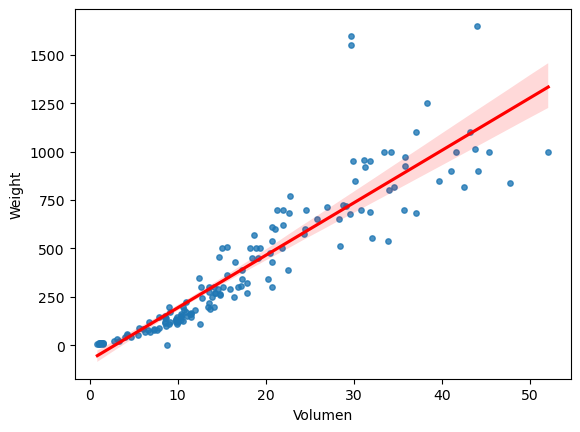

In [14]:
# Grafico de tendencia

grafico_de_tendencia(df,'Volumen','Weight')

C:\Users\franc\AppData\Local\Temp\ipykernel_23580\242315130.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red')  # Color rojo para la curva


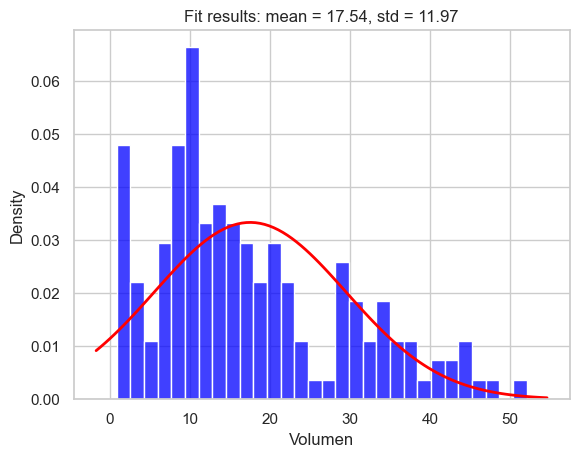

In [15]:
# dist normal ? 

grafico_de_barra(df,'Volumen')

C:\Users\franc\AppData\Local\Temp\ipykernel_23580\242315130.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red')  # Color rojo para la curva


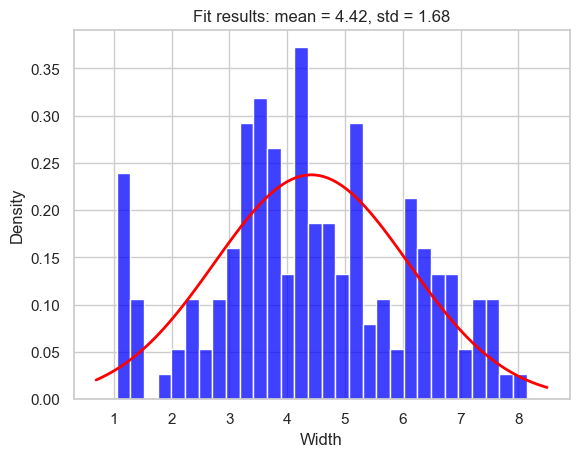

In [16]:
grafico_de_barra(df,'Width')

In [17]:
# Se debe evaluar por tipo de pez 

In [18]:
species_count = df['Species'].value_counts()
print(species_count)

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64


<Axes: xlabel='Volumen', ylabel='Weight'>

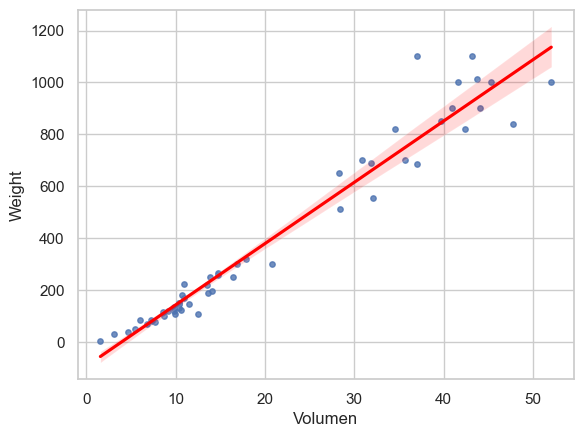

In [19]:
grafico_de_tendencia(df[df['Species']=='Perch'] ,'Volumen','Weight')

# Pareciera que por especie tiene a existir una correlacion



C:\Users\franc\AppData\Local\Temp\ipykernel_23580\242315130.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red')  # Color rojo para la curva


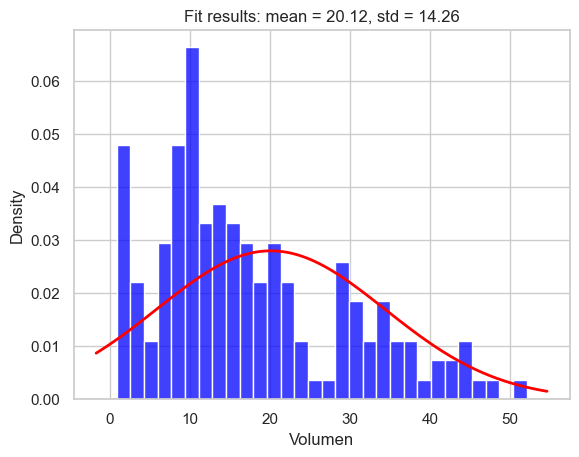

In [20]:
grafico_de_barra(df[df['Species']=='Perch'],'Volumen')

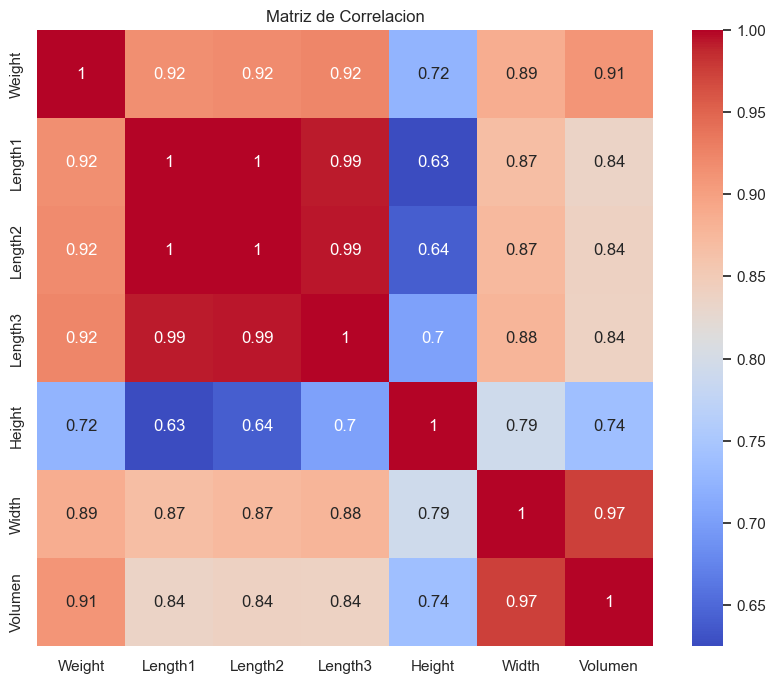

In [21]:
# matiz de correlacion entre columnas numericass

matriz_correlacion(df)

In [22]:
# Al final solo se trabaja con "'Height', 'Volumen'" dado que en la variable volumen, conjugan Width
# no trabajamos con Length3 o con un promedio por que penaliza la variable Height (altura ) 


MAE: 81.1467
MSE: 11751.6402


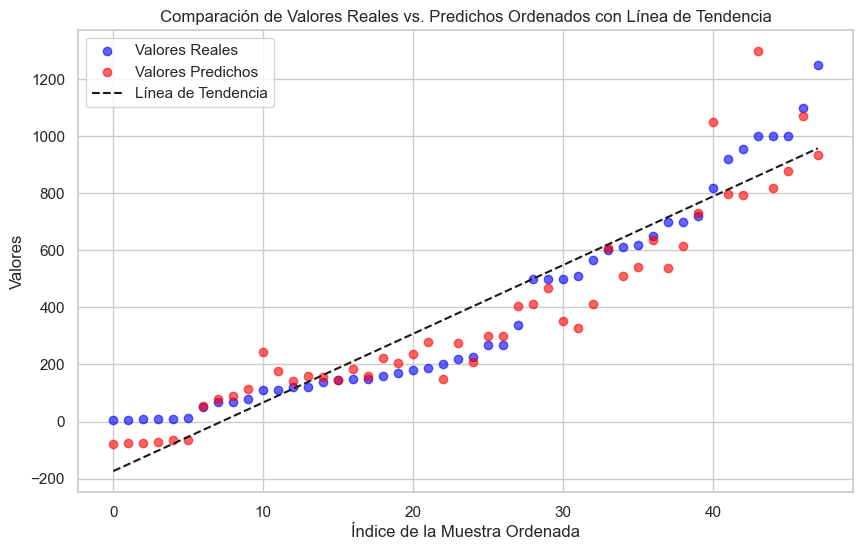

   Feature       VIF
0    const  6.017913
1   Height  2.131607
2  Volumen  2.131607


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     219.6
Date:                Fri, 10 May 2024   Prob (F-statistic):           8.75e-39
Time:                        15:24:35   Log-Likelihood:                -720.71
No. Observations:                 111   AIC:                             1447.
Df Residuals:                     108   BIC:                             1456.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -112.1146     37.723     -2.972      0.004    -186.889     -37.340
Height         5.9298      5.630      1.053      0.295      -5.229      17.089
Volumen       25.6453      1.890     13.570      0.000      21.899      29.391
==============================================================================
Omnibus:                      104.749   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1218.240
Skew:                           3.175   Prob(JB):                    2.90e-265
Kurtosis:                      17.936   Cond. No.                         57.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
funcion_de_regresion_con_ols(df) # Modelo para todos los peces

MAE: 47.4174
MSE: 4528.4175


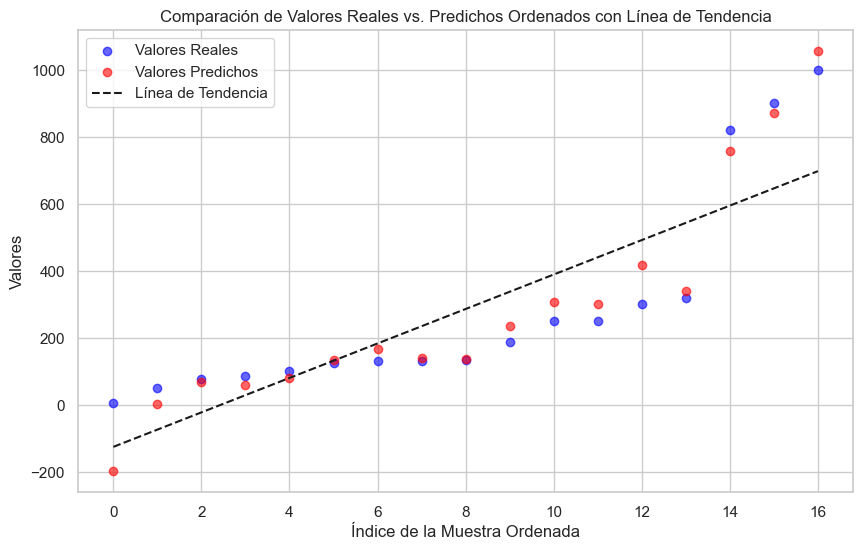

   Feature        VIF
0    const  39.391968
1   Height  18.622610
2  Volumen  18.622610


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     462.0
Date:                Fri, 10 May 2024   Prob (F-statistic):           2.15e-26
Time:                        15:24:59   Log-Likelihood:                -220.21
No. Observations:                  39   AIC:                             446.4
Df Residuals:                      36   BIC:                             451.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -348.9078     71.709     -4.866      0.000    -494.341    -203.475
Height        62.9690     17.106      3.681      0.001      28.276      97.662
Volumen       11.7487      3.444      3.411      0.002       4.763      18.734
==============================================================================
Omnibus:                        8.143   Durbin-Watson:                   2.496
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                6.906
Skew:                           0.879   Prob(JB):                       0.0317
Kurtosis:                       4.076   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
funcion_de_regresion_con_ols(df[df['Species']=='Perch']) # Para Perch 

MAE: 50.2786
MSE: 4644.7975


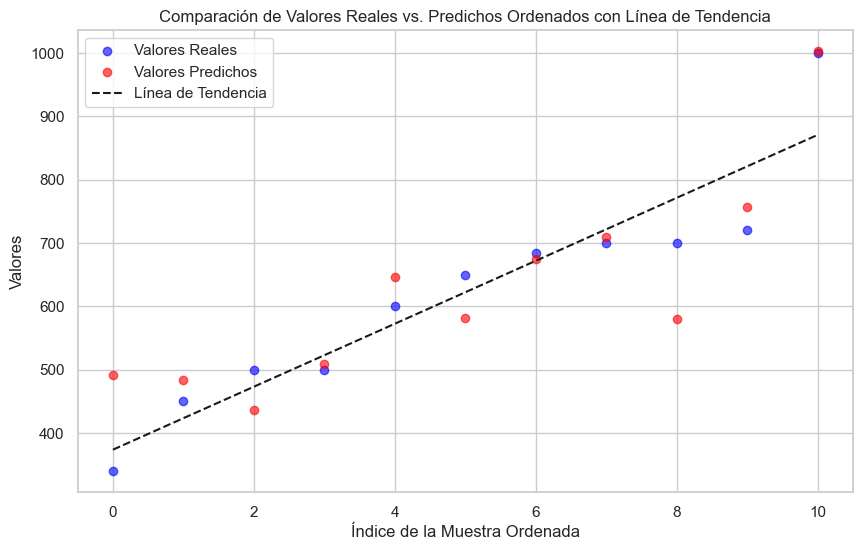

   Feature         VIF
0    const  139.585232
1   Height    8.855696
2  Volumen    8.855696


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     280.4
Date:                Fri, 10 May 2024   Prob (F-statistic):           7.14e-16
Time:                        15:25:00   Log-Likelihood:                -123.82
No. Observations:                  24   AIC:                             253.6
Df Residuals:                      21   BIC:                             257.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -764.3179    108.567     -7.040      0.000    -990.095    -538.541
Height        78.0999     12.941      6.035      0.000      51.187     105.013
Volumen        8.3762      4.166      2.011      0.057      -0.287      17.039
==============================================================================
Omnibus:                        6.037   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                3.950
Skew:                           0.888   Prob(JB):                        0.139
Kurtosis:                       3.894   Cond. No.                         344.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
funcion_de_regresion_con_ols(df[df['Species']=='Bream']) # Para Bream

In [31]:


#"""Para identificar las especies de peces de la lista que son de uso exclusivamente comercial y que 
# además pueden ser criadas juntas, se debe considerar tanto el uso principal de cada especie como su compatibilidad 
# para ser criadas en el mismo entorno. Basado en la información general que proporcionaste y ajustando los criterios a 
# "uso exclusivamente comercial" y "compatibles para criarse juntas", podemos ajustar la tabla para reflejar estas 
# necesidades específicas.""""


df_perch=df[df['Species']=='Smelt']
df_bream=df[df['Species']=='Bream']
df_Parkki=df[df['Species']=='Parkki']
df_Whitefish=df[df['Species']=='Whitefish']

#Lista_comercial_cria_en_conjunto
lista_comercial=pd.concat([df_perch, df_bream,df_Parkki,df_Whitefish])
lista_comercial

,Species,Weight,Length1,Length2,Length3,Height,Width,Volumen
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476,0.861948
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600,1.056832
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484,1.035801
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800,1.495712
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772,1.281173
...,...,...,...,...,...,...,...,...
56,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485,14.176242
57,Whitefish,306.0,25.6,28.0,30.8,8.7780,4.6816,17.213869
58,Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620,33.819122
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736,33.938796


MAE: 71.0646
MSE: 9776.405


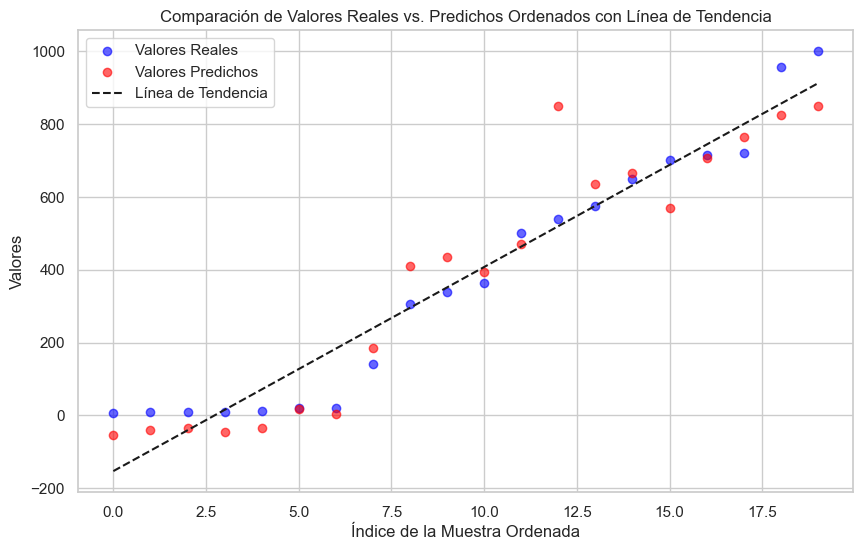

   Feature       VIF
0    const  7.850390
1   Height  6.858429
2  Volumen  6.858429


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     438.6
Date:                Fri, 10 May 2024   Prob (F-statistic):           2.49e-29
Time:                        22:40:52   Log-Likelihood:                -258.30
No. Observations:                  46   AIC:                             522.6
Df Residuals:                      43   BIC:                             528.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -85.3953     28.390     -3.008      0.004    -142.650     -28.141
Height         6.1108      5.208      1.173      0.247      -4.393      16.615
Volumen       25.7342      2.519     10.216      0.000      20.654      30.814
==============================================================================
Omnibus:                        0.007   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.160
Skew:                           0.012   Prob(JB):                        0.923
Kurtosis:                       2.712   Cond. No.                         66.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
funcion_de_regresion_con_ols(lista_comercial)